<a href="https://colab.research.google.com/github/benvictoria21/AnalyzeStocks/blob/master/Johnson_%26_Johnson_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install  yfinance

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance

In [9]:
JNJ = "JNJ" 

In [10]:
JNJ = yfinance.download(JNJ)

JNJ

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.000000,0.223380,0.222222,0.223380,6.196926e-07,0
1962-01-03,0.000000,0.221065,0.219907,0.219907,6.100599e-07,345600
1962-01-04,0.000000,0.221065,0.217593,0.217593,6.036390e-07,216000
1962-01-05,0.000000,0.215856,0.214120,0.214120,5.940062e-07,129600
1962-01-08,0.000000,0.212384,0.210648,0.210648,5.843735e-07,172800
...,...,...,...,...,...,...
2020-09-21,147.580002,147.929993,142.960007,145.100006,1.451000e+02,7574500
2020-09-22,144.690002,145.350006,143.720001,144.210007,1.442100e+02,5295900
2020-09-23,147.479996,147.550003,144.380005,144.440002,1.444400e+02,8784400


In [11]:
JNJ.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.0,0.223380,0.222222,0.223380,6.196926e-07,0
1962-01-03,0.0,0.221065,0.219907,0.219907,6.100599e-07,345600
1962-01-04,0.0,0.221065,0.217593,0.217593,6.036390e-07,216000
1962-01-05,0.0,0.215856,0.214120,0.214120,5.940062e-07,129600
1962-01-08,0.0,0.212384,0.210648,0.210648,5.843735e-07,172800


In [12]:
JNJ.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-21,147.580002,147.929993,142.960007,145.100006,145.100006,7574500
2020-09-22,144.690002,145.350006,143.720001,144.210007,144.210007,5295900
2020-09-23,147.479996,147.550003,144.380005,144.440002,144.440002,8784400
2020-09-24,144.559998,145.250000,143.339996,144.669998,144.669998,5614800
2020-09-25,144.000000,146.250000,143.889999,145.660004,145.660004,5527700


In [13]:
JNJ.describe()

,Open,High,Low,Close,Adj Close,Volume
count,14786.000000,14786.000000,14786.000000,14786.000000,1.478600e+04,1.478600e+04
mean,32.953652,33.263442,32.750965,33.016837,2.471406e+01,5.499373e+06
std,40.732126,40.968065,40.393669,40.690591,3.681407e+01,5.079089e+06
min,0.000000,0.146991,0.142361,0.142361,3.983830e-07,0.000000e+00
25%,1.838542,1.854167,1.828125,1.841797,2.657841e-05,1.546800e+06
50%,9.875000,9.968750,9.757812,9.875000,3.667267e+00,4.750250e+06
75%,60.094999,60.490002,59.680000,60.077501,4.016117e+01,7.787375e+06
max,155.570007,157.000000,154.000000,155.509995,1.538300e+02,1.446720e+08


In [14]:
JNJ.info

<bound method DataFrame.info of                   Open        High  ...     Adj Close   Volume
Date                                ...                       
1962-01-02    0.000000    0.223380  ...  6.196926e-07        0
1962-01-03    0.000000    0.221065  ...  6.100599e-07   345600
1962-01-04    0.000000    0.221065  ...  6.036390e-07   216000
1962-01-05    0.000000    0.215856  ...  5.940062e-07   129600
1962-01-08    0.000000    0.212384  ...  5.843735e-07   172800
...                ...         ...  ...           ...      ...
2020-09-21  147.580002  147.929993  ...  1.451000e+02  7574500
2020-09-22  144.690002  145.350006  ...  1.442100e+02  5295900
2020-09-23  147.479996  147.550003  ...  1.444400e+02  8784400
2020-09-24  144.559998  145.250000  ...  1.446700e+02  5614800
2020-09-25  144.000000  146.250000  ...  1.456600e+02  5527700

[14786 rows x 6 columns]>

In [15]:
JNJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14786 entries, 1962-01-02 to 2020-09-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       14786 non-null  float64
 1   High       14786 non-null  float64
 2   Low        14786 non-null  float64
 3   Close      14786 non-null  float64
 4   Adj Close  14786 non-null  float64
 5   Volume     14786 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 808.6 KB


In [16]:
conn = sqlite3.connect("JNJ.db")
c = conn.cursor()

In [17]:
conn = sqlite3.connect("JNJ.db")
c = conn.cursor()

In [18]:
JNJ.to_sql("JNJ", conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [19]:
#See data
c.execute("""SELECT * FROM JNJ""")
rows = c.fetchall()
rows

[('1962-01-02 00:00:00',
  0.0,
  0.22337962687015533,
  0.2222222238779068,
  0.22337962687015533,
  6.196925710355572e-07,
  0),
 ('1962-01-03 00:00:00',
  0.0,
  0.22106482088565826,
  0.21990740299224854,
  0.21990740299224854,
  6.100598852754047e-07,
  345600),
 ('1962-01-04 00:00:00',
  0.0,
  0.22106482088565826,
  0.21759259700775146,
  0.21759259700775146,
  6.036389663677255e-07,
  216000),
 ('1962-01-05 00:00:00',
  0.0,
  0.21585647761821747,
  0.21412037312984467,
  0.21412037312984467,
  5.940061669207353e-07,
  129600),
 ('1962-01-08 00:00:00',
  0.0,
  0.21238425374031067,
  0.21064814925193787,
  0.21064814925193787,
  5.843735380040016e-07,
  172800),
 ('1962-01-09 00:00:00',
  0.0,
  0.21296297013759613,
  0.21296297013759613,
  0.21296297013759613,
  5.907952527195448e-07,
  43200),
 ('1962-01-10 00:00:00',
  0.0,
  0.21759259700775146,
  0.21469907462596893,
  0.21759259700775146,
  6.036389663677255e-07,
  172800),
 ('1962-01-11 00:00:00',
  0.0,
  0.217592597007

In [20]:
JNJ.to_excel("JNJ.xls")

pd.read_excel("JNJ.xls")

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.000000,0.223380,0.222222,0.223380,6.196926e-07,0
1,1962-01-03,0.000000,0.221065,0.219907,0.219907,6.100599e-07,345600
2,1962-01-04,0.000000,0.221065,0.217593,0.217593,6.036390e-07,216000
3,1962-01-05,0.000000,0.215856,0.214120,0.214120,5.940062e-07,129600
4,1962-01-08,0.000000,0.212384,0.210648,0.210648,5.843735e-07,172800
...,...,...,...,...,...,...,...
14781,2020-09-21,147.580002,147.929993,142.960007,145.100006,1.451000e+02,7574500
14782,2020-09-22,144.690002,145.350006,143.720001,144.210007,1.442100e+02,5295900
14783,2020-09-23,147.479996,147.550003,144.380005,144.440002,1.444400e+02,8784400
14784,2020-09-24,144.559998,145.250000,143.339996,144.669998,1.446700e+02,5614800


findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


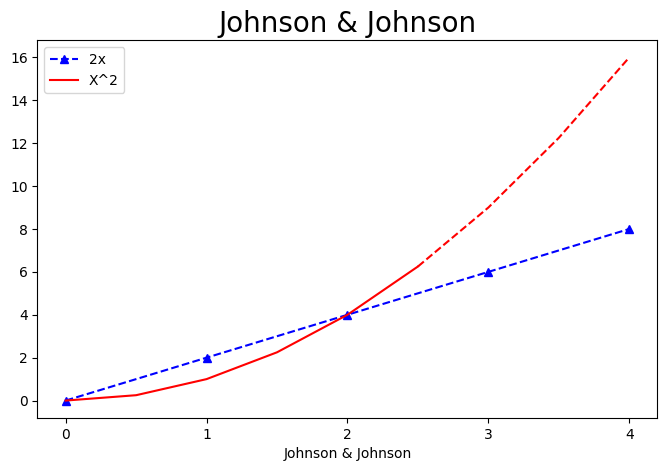

In [21]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('Johnson & Johnson', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Johnson & Johnson')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()

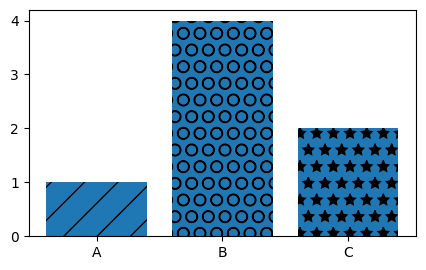

In [22]:
labels = ['A', 'B', 'C']
values = [1,4,2]

plt.figure(figsize=(5,3), dpi=100)

bars = plt.bar(labels, values)

patterns = ['/', 'O', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.savefig('barchart.png', dpi=300)

plt.show()